In [92]:
import sklearn
import sklearn.preprocessing
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn import metrics
import numpy as np
from IPython.display import display, HTML 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import GaussianNoise
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

RANDOM_SEED = 0
np.random.seed(RANDOM_SEED)

%matplotlib inline
from pandas.plotting import scatter_matrix
matplotlib.rcParams['figure.figsize'] = (10, 6)

### Dataset Cleaning and reformat

In [93]:
data = pd.read_csv('data/PRSA_data_2010.1.1-2014.12.31.csv')
data.head(10)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


In [94]:
data["timestamp"] = pd.to_datetime(data[["year", "month", "day", "hour"]])

In [95]:
data.drop(["No"], axis=1, inplace=True) 

In [96]:
data = data.set_index("timestamp")

In [97]:
# New index dataset
data.head(10)

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
timestamp,,,,,,,,,,,,
2010-01-01 00:00:00,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
2010-01-01 05:00:00,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
2010-01-01 06:00:00,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
2010-01-01 07:00:00,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
2010-01-01 08:00:00,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0


In [98]:
# Shape
print(data.shape)

(43824, 12)


In [99]:
# Drop rows with NAN value 
data = data.dropna()
data.head(10)

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
timestamp,,,,,,,,,,,,
2010-01-02 00:00:00,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
2010-01-02 05:00:00,2010,1,2,5,109.0,-7,-6.0,1022.0,SE,7.14,3,0
2010-01-02 06:00:00,2010,1,2,6,105.0,-7,-6.0,1023.0,SE,8.93,4,0
2010-01-02 07:00:00,2010,1,2,7,124.0,-7,-5.0,1024.0,SE,10.72,0,0
2010-01-02 08:00:00,2010,1,2,8,120.0,-8,-6.0,1024.0,SE,12.51,0,0


In [100]:
# Shape
print(data.shape)

(41757, 12)


In [101]:
# Factorize String data
data.loc[:, 'cbwd'] = pd.factorize(data.loc[:, 'cbwd'])[0]
data.head(10)

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
timestamp,,,,,,,,,,,,
2010-01-02 00:00:00,2010,1,2,0,129.0,-16,-4.0,1020.0,0,1.79,0,0
2010-01-02 01:00:00,2010,1,2,1,148.0,-15,-4.0,1020.0,0,2.68,0,0
2010-01-02 02:00:00,2010,1,2,2,159.0,-11,-5.0,1021.0,0,3.57,0,0
2010-01-02 03:00:00,2010,1,2,3,181.0,-7,-5.0,1022.0,0,5.36,1,0
2010-01-02 04:00:00,2010,1,2,4,138.0,-7,-5.0,1022.0,0,6.25,2,0
2010-01-02 05:00:00,2010,1,2,5,109.0,-7,-6.0,1022.0,0,7.14,3,0
2010-01-02 06:00:00,2010,1,2,6,105.0,-7,-6.0,1023.0,0,8.93,4,0
2010-01-02 07:00:00,2010,1,2,7,124.0,-7,-5.0,1024.0,0,10.72,0,0
2010-01-02 08:00:00,2010,1,2,8,120.0,-8,-6.0,1024.0,0,12.51,0,0


In [102]:
# Saved cleaned data
data.to_csv('data/cleaned_data')

### Data Static Summary

In [103]:
print(data.describe())

               year         month           day          hour         pm2.5  \
count  41757.000000  41757.000000  41757.000000  41757.000000  41757.000000   
mean    2012.042771      6.513758     15.685514     11.502311     98.613215   
std        1.415311      3.454199      8.785539      6.924848     92.050387   
min     2010.000000      1.000000      1.000000      0.000000      0.000000   
25%     2011.000000      4.000000      8.000000      5.000000     29.000000   
50%     2012.000000      7.000000     16.000000     12.000000     72.000000   
75%     2013.000000     10.000000     23.000000     18.000000    137.000000   
max     2014.000000     12.000000     31.000000     23.000000    994.000000   

               DEWP          TEMP          PRES          cbwd           Iws  \
count  41757.000000  41757.000000  41757.000000  41757.000000  41757.000000   
mean       1.750174     12.401561   1016.442896      1.201715     23.866747   
std       14.433658     12.175215     10.300733    

### Dataset Visualization

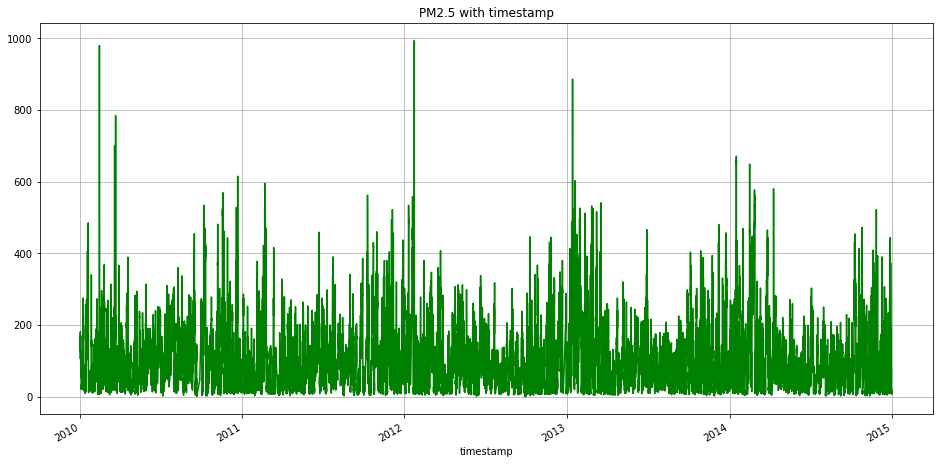

In [104]:
# Show how data looks like
plt.figure(figsize=[16, 8])
data['pm2.5'].plot(kind='line',color='green',grid=True)
plt.title("PM2.5 with timestamp");

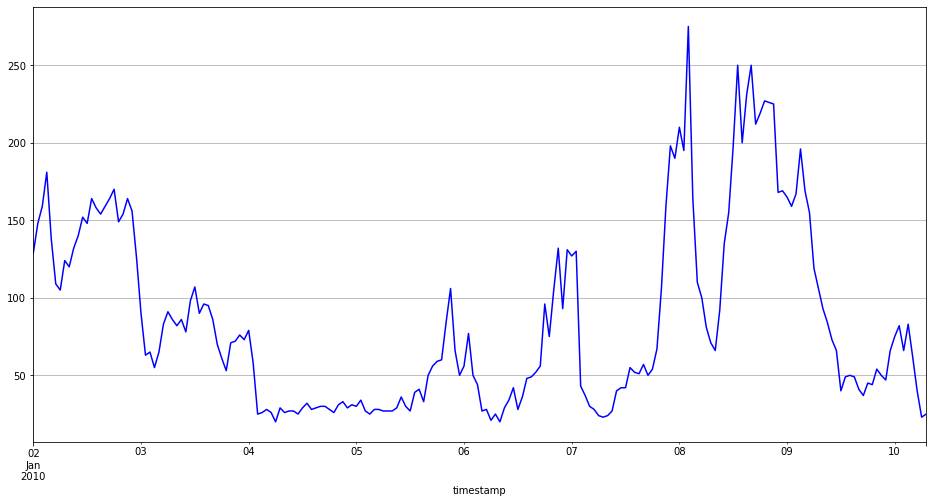

In [105]:
# Show one month zoom in pm2.5 data
plt.figure(figsize=[16, 8])
data['pm2.5'][:200].plot(kind='line',color='blue',grid=True);

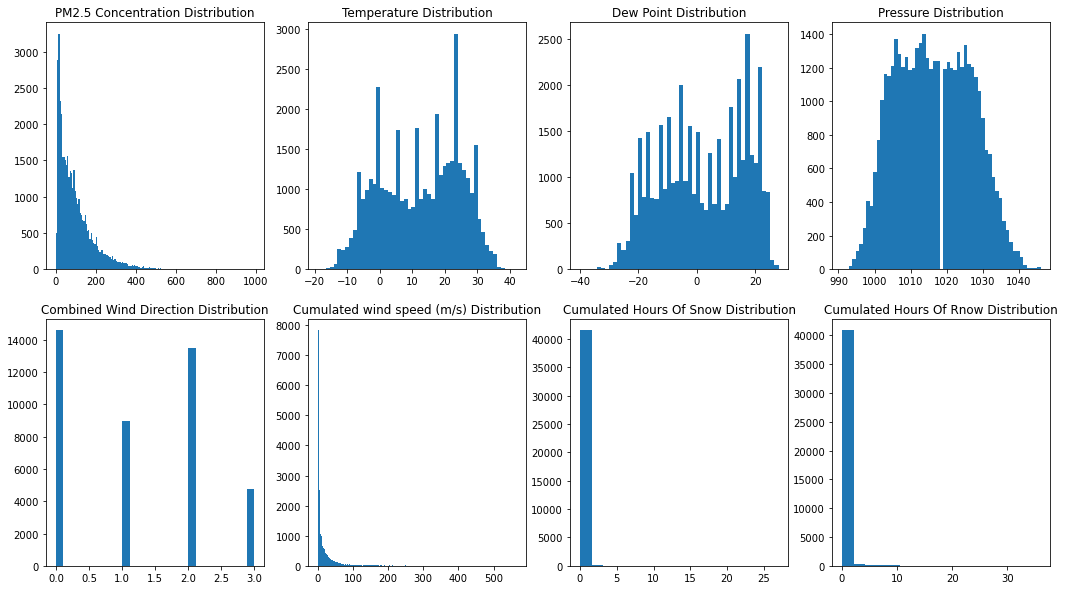

In [106]:
# plot the data distribution
content_list = ['pm2.5', 'TEMP', 'DEWP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']
title_list = ['PM2.5 Concentration Distribution', 'Temperature Distribution', 'Dew Point Distribution', \
             'Pressure Distribution', 'Combined Wind Direction Distribution', 'Cumulated wind speed (m/s) Distribution', \
             'Cumulated Hours Of Snow Distribution', 'Cumulated Hours Of Rnow Distribution']

plt.figure(figsize=(18,10))
for i in range(len(content_list)):
    plt.subplot(2, 4, i+1)
    plt.hist(data[content_list[i]], bins='auto')
    plt.title(title_list[i])

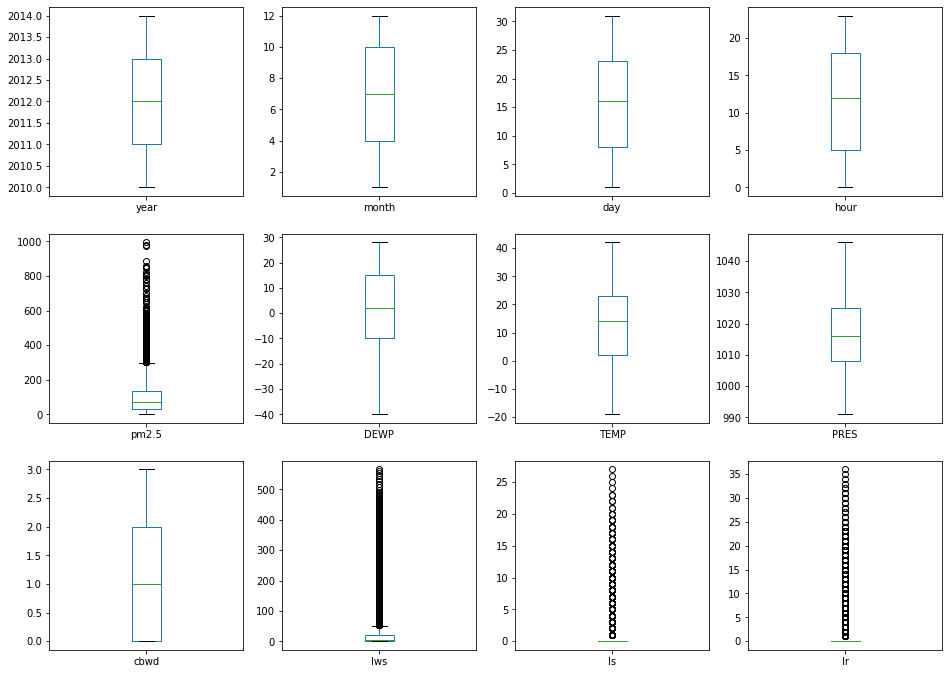

In [107]:
# Univariate plot
data.plot(kind='box', subplots=True, layout=(4,4), figsize=[16,16], sharex=False, sharey=False);

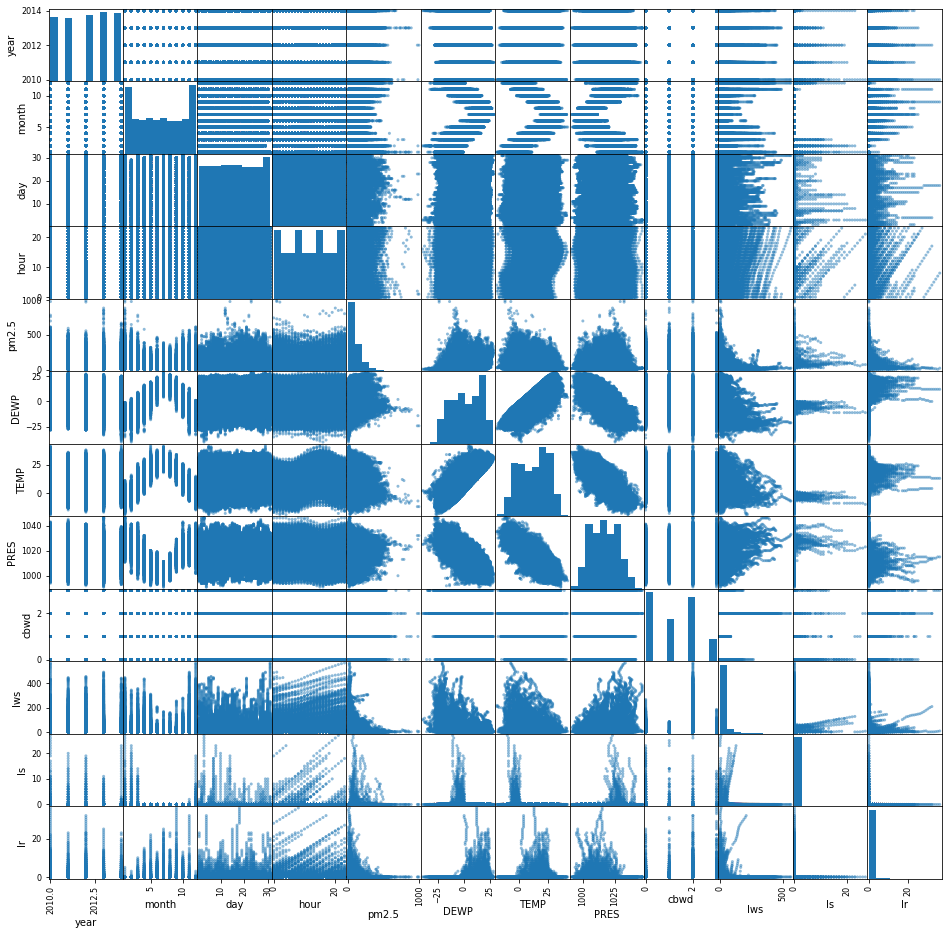

In [108]:
# Multivariate Plots
scatter_matrix(data,figsize=[16,16])
plt.show()

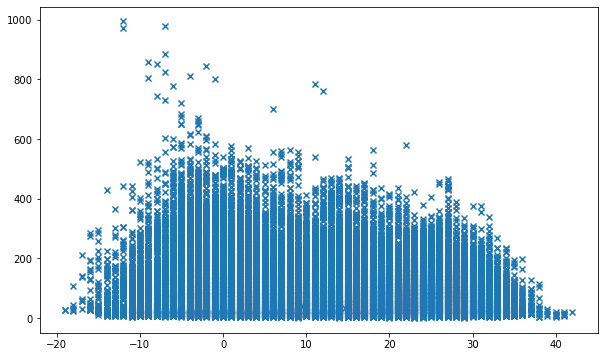

In [109]:
# Zoom in the relation between temp and pm2.5
plt.scatter(data['TEMP'], data['pm2.5'], marker= "x")

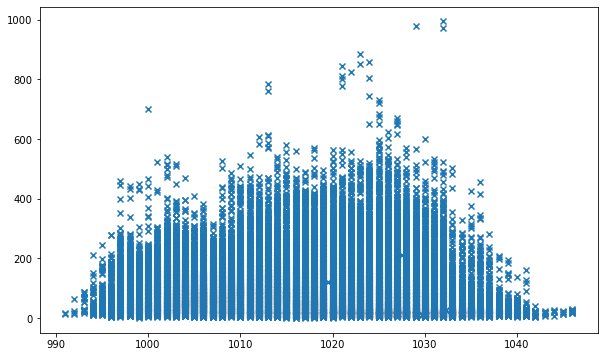

In [110]:
# Zoom in the relation between PRES and pm2.5
plt.scatter(data['PRES'], data['pm2.5'], marker= "x")

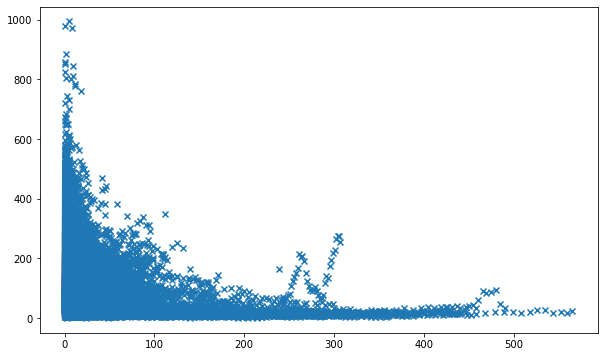

In [111]:
# Zoom in the relation between Iws and pm2.5
plt.scatter(data['Iws'], data['pm2.5'], marker= "x")

### Data Wrangling

In [112]:
# Sign a new column
data = data.assign(anom=pd.Series(np.zeros(len(data), dtype=np.int)).values)
data

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,anom
timestamp,,,,,,,,,,,,,
2010-01-02 00:00:00,2010,1,2,0,129.0,-16,-4.0,1020.0,0,1.79,0,0,0
2010-01-02 01:00:00,2010,1,2,1,148.0,-15,-4.0,1020.0,0,2.68,0,0,0
2010-01-02 02:00:00,2010,1,2,2,159.0,-11,-5.0,1021.0,0,3.57,0,0,0
2010-01-02 03:00:00,2010,1,2,3,181.0,-7,-5.0,1022.0,0,5.36,1,0,0
2010-01-02 04:00:00,2010,1,2,4,138.0,-7,-5.0,1022.0,0,6.25,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,2014,12,31,19,8.0,-23,-2.0,1034.0,2,231.97,0,0,0
2014-12-31 20:00:00,2014,12,31,20,10.0,-22,-3.0,1034.0,2,237.78,0,0,0
2014-12-31 21:00:00,2014,12,31,21,10.0,-22,-3.0,1034.0,2,242.70,0,0,0


In [113]:
df25 = data.loc[:, 'pm2.5']
df25

timestamp
2010-01-02 00:00:00    129.0
2010-01-02 01:00:00    148.0
2010-01-02 02:00:00    159.0
2010-01-02 03:00:00    181.0
2010-01-02 04:00:00    138.0
                       ...  
2014-12-31 19:00:00      8.0
2014-12-31 20:00:00     10.0
2014-12-31 21:00:00     10.0
2014-12-31 22:00:00      8.0
2014-12-31 23:00:00     12.0
Name: pm2.5, Length: 41757, dtype: float64

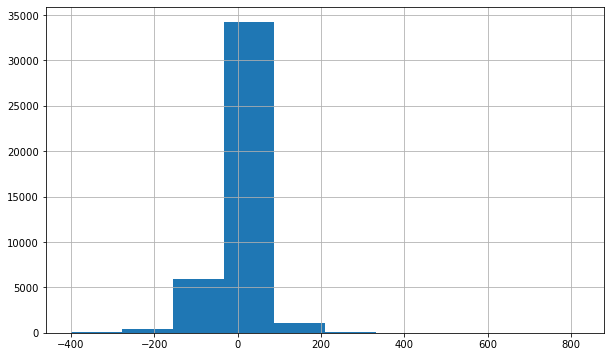

In [114]:
# Different rolling window for labeling
# Rolling window 12hrs
df25_12_column = df25 - df25.rolling(12).mean()
df25_12_column.name = 'diff_12hr_pm2.5'
df25_12_column.hist();

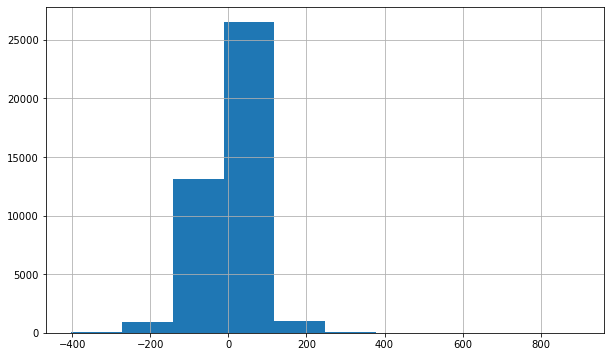

In [115]:
# Rolling window 24hrs
df25_24_column = df25 - df25.rolling(24).mean()
df25_24_column.name = 'diff_24hr_pm2.5'
df25_24_column.hist();

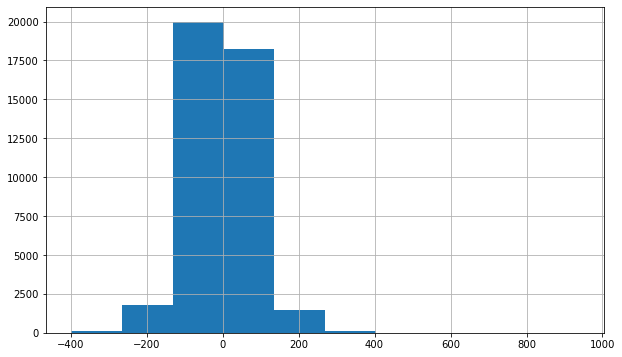

In [116]:
# Rolling window 48hrs
df25_48_column = df25 - df25.rolling(48).mean()
df25_48_column.name = 'diff_48hr_pm2.5'
df25_48_column.hist();

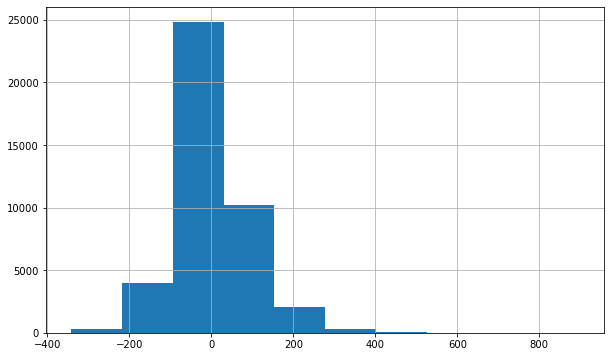

In [117]:
# Rolling window 144hrs
df25_144_column = df25 - df25.rolling(144).mean()
df25_144_column.name = 'diff_144hr_pm2.5'
df25_144_column.hist();

In [118]:
# Declear window list
window_list = [df25_12_column, df25_24_column, df25_48_column, df25_144_column]

In [119]:
df25_24_column

timestamp
2010-01-02 00:00:00         NaN
2010-01-02 01:00:00         NaN
2010-01-02 02:00:00         NaN
2010-01-02 03:00:00         NaN
2010-01-02 04:00:00         NaN
                         ...   
2014-12-31 19:00:00   -3.291667
2014-12-31 20:00:00   -0.625000
2014-12-31 21:00:00   -0.208333
2014-12-31 22:00:00   -2.208333
2014-12-31 23:00:00    1.958333
Name: diff_24hr_pm2.5, Length: 41757, dtype: float64

In [120]:
def get_new_dataframe_with_anomaly_label(original_dataset, window_column_series):
    newdata = pd.concat([data, window_column_series], axis=1)
    newdata.columns.values[-1] = 'diff_pm_2.5'
    newdata.loc[newdata['diff_pm_2.5'] >= 3*(newdata['diff_pm_2.5']).std(),'anom'] = 1
    plt.figure(figsize=(16,8))
    plt.plot(newdata['pm2.5'], markevery=newdata['anom']==1, marker='x', markeredgecolor='red', color='green',markersize=10)
    #print(newdata([newdata['anom']==1]).head(10))
    print('{0} total anomaly numbers : {1}'.format(window_column_series.name,len(newdata[newdata['anom']==1])))
    plt.title('Window size : {0}'.format(window_column_series.name))
    return newdata

In [121]:
newdata = pd.concat([data, df25_24_column], axis=1)
newdata

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,anom,diff_24hr_pm2.5
timestamp,,,,,,,,,,,,,,
2010-01-02 00:00:00,2010,1,2,0,129.0,-16,-4.0,1020.0,0,1.79,0,0,0,NaN
2010-01-02 01:00:00,2010,1,2,1,148.0,-15,-4.0,1020.0,0,2.68,0,0,0,NaN
2010-01-02 02:00:00,2010,1,2,2,159.0,-11,-5.0,1021.0,0,3.57,0,0,0,NaN
2010-01-02 03:00:00,2010,1,2,3,181.0,-7,-5.0,1022.0,0,5.36,1,0,0,NaN
2010-01-02 04:00:00,2010,1,2,4,138.0,-7,-5.0,1022.0,0,6.25,2,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,2014,12,31,19,8.0,-23,-2.0,1034.0,2,231.97,0,0,0,-3.291667
2014-12-31 20:00:00,2014,12,31,20,10.0,-22,-3.0,1034.0,2,237.78,0,0,0,-0.625000
2014-12-31 21:00:00,2014,12,31,21,10.0,-22,-3.0,1034.0,2,242.70,0,0,0,-0.208333


In [122]:
# newdata.columns.values[-1] = 'diff_pm_2.5'
# newdata

In [123]:
# scatter_matrix(newdata,figsize=[16,16])
# plt.plot()

In [124]:
newdata.loc[newdata['diff_24hr_pm2.5'] >= 3*(newdata['diff_24hr_pm2.5']).std(),'anom'] = 1

In [125]:
newdata[newdata['anom'] == 1]

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,anom,diff_24hr_pm2.5
timestamp,,,,,,,,,,,,,,
2010-01-08 02:00:00,2010,1,8,2,275.0,-20,-16.0,1031.0,3,0.89,0,0,1,190.166667
2010-01-14 01:00:00,2010,1,14,1,257.0,-20,-15.0,1025.0,3,2.67,0,0,1,204.250000
2010-01-16 03:00:00,2010,1,16,3,271.0,-16,-13.0,1035.0,3,0.89,0,0,1,194.541667
2010-01-26 20:00:00,2010,1,26,20,274.0,-11,-5.0,1020.0,3,0.89,0,0,1,200.583333
2010-01-26 21:00:00,2010,1,26,21,340.0,-13,-6.0,1020.0,2,1.79,0,0,1,253.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-09 15:00:00,2014,12,9,15,390.0,-8,0.0,1031.0,1,0.89,0,0,1,283.541667
2014-12-09 16:00:00,2014,12,9,16,375.0,-8,0.0,1031.0,1,1.78,0,0,1,253.625000
2014-12-09 17:00:00,2014,12,9,17,367.0,-8,0.0,1031.0,3,0.89,0,0,1,231.083333


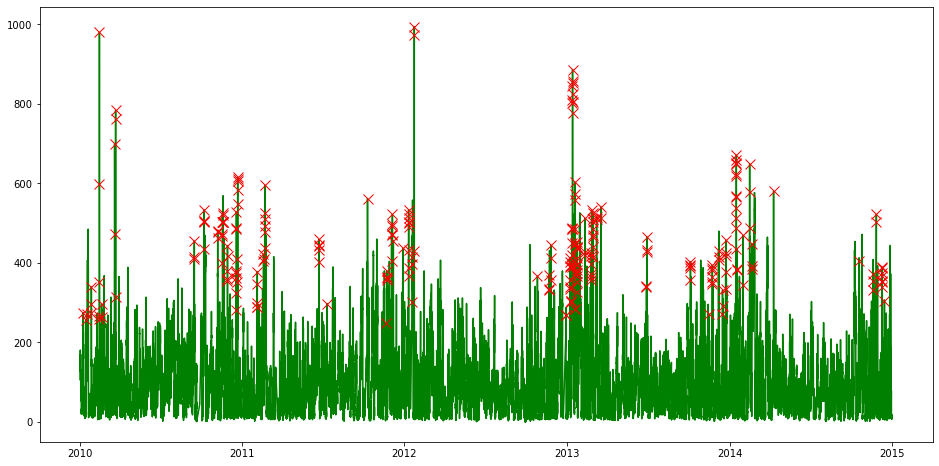

In [126]:
#Flag Anormalies
plt.figure(figsize=(16,8))
plt.plot(newdata['pm2.5'], markevery=newdata['anom']==1, marker='x', markeredgecolor='red', color='green',markersize=10)

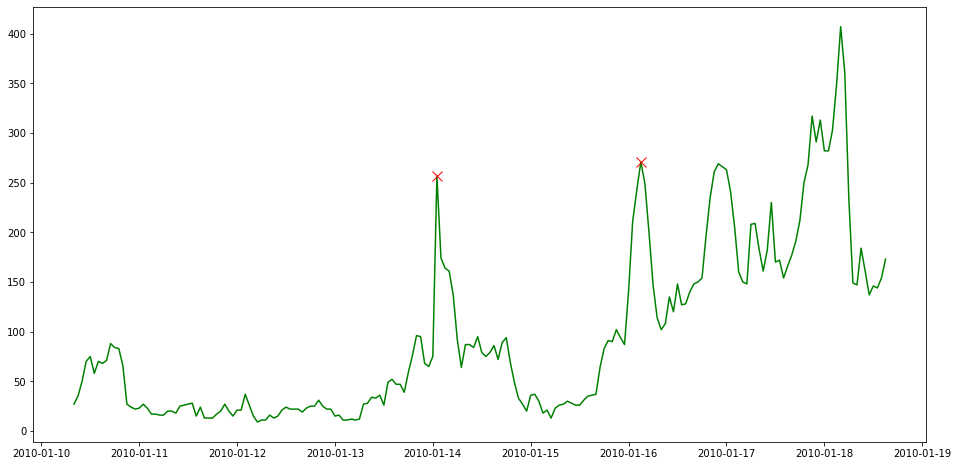

In [127]:
#Flag Anormalies
plt.figure(figsize=(16,8))
plt.plot(newdata['pm2.5'][200:400], markevery=newdata['anom'][200:400]==1, marker='x', markeredgecolor='red', color='green',markersize=10)

diff_12hr_pm2.5 total anomaly numbers : 262
diff_24hr_pm2.5 total anomaly numbers : 251
diff_48hr_pm2.5 total anomaly numbers : 263
diff_144hr_pm2.5 total anomaly numbers : 384


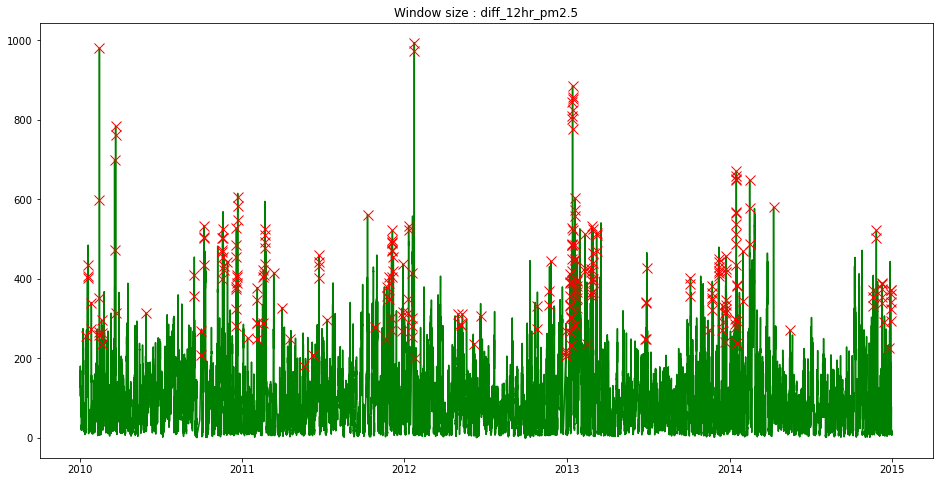

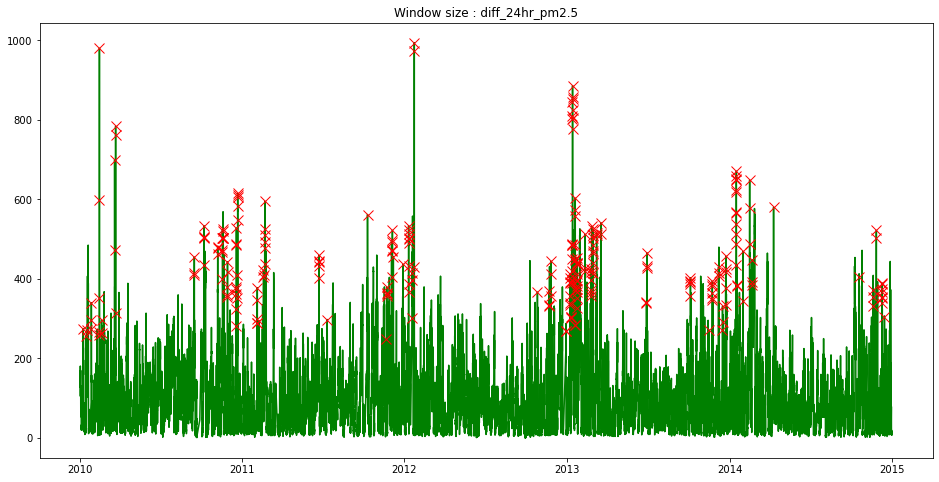

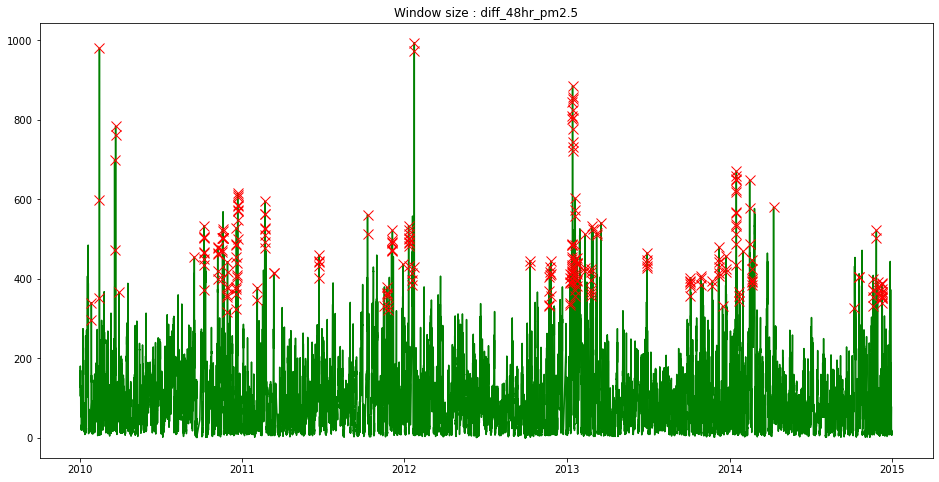

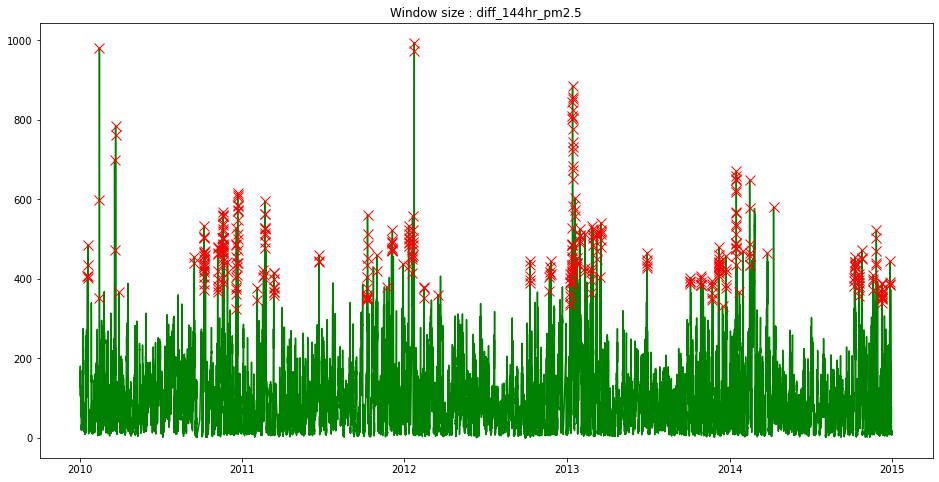

In [128]:
newdata_list = []
for i in window_list:
    #print(i)
    newdata_list.append(get_new_dataframe_with_anomaly_label(data, i))

In [129]:
# All 4 dataframe
newdata_list

[                     year  month  day  hour  pm2.5  DEWP  TEMP    PRES  cbwd  \
 timestamp                                                                      
 2010-01-02 00:00:00  2010      1    2     0  129.0   -16  -4.0  1020.0     0   
 2010-01-02 01:00:00  2010      1    2     1  148.0   -15  -4.0  1020.0     0   
 2010-01-02 02:00:00  2010      1    2     2  159.0   -11  -5.0  1021.0     0   
 2010-01-02 03:00:00  2010      1    2     3  181.0    -7  -5.0  1022.0     0   
 2010-01-02 04:00:00  2010      1    2     4  138.0    -7  -5.0  1022.0     0   
 ...                   ...    ...  ...   ...    ...   ...   ...     ...   ...   
 2014-12-31 19:00:00  2014     12   31    19    8.0   -23  -2.0  1034.0     2   
 2014-12-31 20:00:00  2014     12   31    20   10.0   -22  -3.0  1034.0     2   
 2014-12-31 21:00:00  2014     12   31    21   10.0   -22  -3.0  1034.0     2   
 2014-12-31 22:00:00  2014     12   31    22    8.0   -22  -4.0  1034.0     2   
 2014-12-31 23:00:00  2014  

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,anom,diff_pm_2.5
timestamp,,,,,,,,,,,,,,
2010-01-02 00:00:00,2010,1,2,0,129.0,-16,-4.0,1020.0,0,1.79,0,0,0,NaN
2010-01-02 01:00:00,2010,1,2,1,148.0,-15,-4.0,1020.0,0,2.68,0,0,0,NaN
2010-01-02 02:00:00,2010,1,2,2,159.0,-11,-5.0,1021.0,0,3.57,0,0,0,NaN
2010-01-02 03:00:00,2010,1,2,3,181.0,-7,-5.0,1022.0,0,5.36,1,0,0,NaN
2010-01-02 04:00:00,2010,1,2,4,138.0,-7,-5.0,1022.0,0,6.25,2,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,2014,12,31,19,8.0,-23,-2.0,1034.0,2,231.97,0,0,0,-1.833333
2014-12-31 20:00:00,2014,12,31,20,10.0,-22,-3.0,1034.0,2,237.78,0,0,0,0.000000
2014-12-31 21:00:00,2014,12,31,21,10.0,-22,-3.0,1034.0,2,242.70,0,0,0,-0.166667


In [232]:
# we use the first dataset in newdata_list in our project
newdata = newdata_list[0]
# drop the first few lines with NaN in diff_pm_2.5
newdata = newdata.dropna()
tag = newdata['anom'].copy()

In [233]:
# this part is refer to "https://www.kaggle.com/robinteuwens/anomaly-detection-with-auto-encoders"
# manual parameter 
RATIO_TO_ANOMALY = 10

# splitting by class
anomaly = newdata[newdata.anom == 1]
normal = newdata[newdata.anom == 0]

# undersample clean transactions
normal_undersampled = normal.sample(
    int(len(anomaly) * RATIO_TO_ANOMALY),
    random_state=RANDOM_SEED
)

# concatenate with fraud transactions into a single dataframe
visualisation_initial = pd.concat([anomaly, normal_undersampled])
column_names = list(visualisation_initial.drop('anom', axis=1).columns)

# isolate features from labels 
features, labels = visualisation_initial.drop('anom', axis=1).values, \
                   visualisation_initial.anom.values


def tsne_scatter(features, labels, dimensions=2, save_as='graph.png'):
    if dimensions not in (2, 3):
        raise ValueError('tsne_scatter can only plot in 2d or 3d')
    # t-SNE dimensionality reduction
    features_embedded = TSNE(n_components=dimensions, random_state=RANDOM_SEED).fit_transform(features)
    # initialising the plot
    fig, ax = plt.subplots(figsize=(8,8))
    # counting dimensions
    if dimensions == 3: ax = fig.add_subplot(111, projection='3d')
    # plotting data
    ax.scatter(
        *zip(*features_embedded[np.where(labels==1)]),
        marker='o',
        color='r',
        s=2,
        alpha=0.7,
        label='Anomaly'
    )
    ax.scatter(
        *zip(*features_embedded[np.where(labels==0)]),
        marker='o',
        color='g',
        s=2,
        alpha=0.3,
        label='Normal'
    )
                         
    # storing it to be displayed later
    plt.legend(loc='best')
    plt.savefig(save_as)
    plt.show

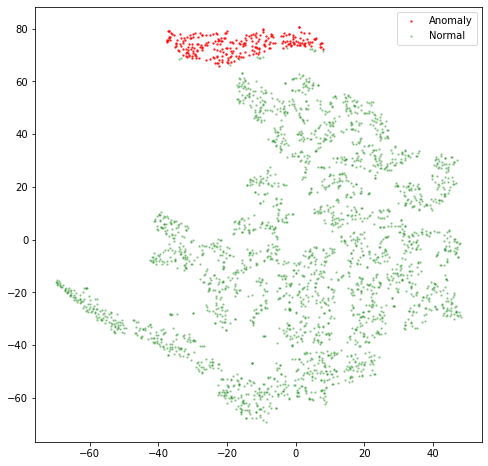

In [234]:
# print the t-sne
tsne_scatter(features, labels, dimensions=2, save_as='tsne_initial_2d.png')

In [403]:
# we use the first 31318 data for training
training_data = newdata.iloc[:31318, :]
training_data_tag = tag[:31318]

# split training data into normal and validation
pure_training_data = training_data.iloc[:23489, :]
pure_training_tag = training_data_tag[:23489]
validation_training_data = training_data.iloc[23489:, :]
validation_training_tag = training_data_tag[23489:]

# generate normal/anomaly data mask
normal_mask = pure_training_data['anom']==0
anomaly_mask = pure_training_data['anom']==1

normal_pure_training_tag = pure_training_tag[normal_mask]
anomaly_pure_training_tag = pure_training_tag[anomaly_mask]

# normalize the pure training data
pure_training_data=(pure_training_data-pure_training_data.mean())/pure_training_data.std()

# normalize the validation data
validation_training_data=(validation_training_data-validation_training_data.mean())/validation_training_data.std()

# the left data is for testing
testing_data = newdata.iloc[31318:, :]
testing_data_tag = tag[31318:]

# normalize the testing data
testing_data = (testing_data-testing_data.mean())/testing_data.std()


# make a copy for seperate purpose
whole_data = newdata.copy()
whole_data.drop('anom',axis=1,inplace=True)
whole_data_wot = whole_data.values

In [404]:
# the autoencoder does not need to know the tag information and some other information for tag purpose, so drop it
pure_training_data.drop('anom',axis=1,inplace=True)
pure_training_data.drop('diff_pm_2.5',axis=1,inplace=True)
pure_training_data.drop('year',axis=1,inplace=True)
pure_training_data.drop('month',axis=1,inplace=True)
pure_training_data.drop('day',axis=1,inplace=True)
pure_training_data.drop('hour',axis=1,inplace=True)

validation_training_data.drop('anom',axis=1,inplace=True)
validation_training_data.drop('diff_pm_2.5',axis=1,inplace=True)
validation_training_data.drop('year',axis=1,inplace=True)
validation_training_data.drop('month',axis=1,inplace=True)
validation_training_data.drop('day',axis=1,inplace=True)
validation_training_data.drop('hour',axis=1,inplace=True)

testing_data.drop('anom',axis=1,inplace=True)
testing_data.drop('diff_pm_2.5',axis=1,inplace=True)
testing_data.drop('year',axis=1,inplace=True)
testing_data.drop('month',axis=1,inplace=True)
testing_data.drop('day',axis=1,inplace=True)
testing_data.drop('hour',axis=1,inplace=True)


In [405]:
df_normal = pure_training_data[normal_mask]
df_anomaly = pure_training_data[anomaly_mask]

In [406]:
x_normal_train = df_normal.values
X_anomaly = df_anomaly.values
x_normal_validation = validation_training_data
X_testing = testing_data.values

In [417]:
X_testing.shape

(10428, 8)

In [436]:
model_list = []
history_list = []
for outlayer_dim in range(3, 8):
    for inlayer_dim in range(2, outlayer_dim):
        model = Sequential()
        model.add(Dense(outlayer_dim, input_dim=x_normal_train.shape[1], activation='relu'))
        model.add(Dense(inlayer_dim, activation='relu')) # latent code layer
        model.add(Dense(outlayer_dim, activation='relu'))
        model.add(Dense(x_normal_train.shape[1])) # Multiple output neurons
        model.compile(loss='mean_squared_error', optimizer='adam')
        history = model.fit(x_normal_train, x_normal_train, 
                  epochs=20, 
                  batch_size=512,
                  validation_data=(x_normal_validation, x_normal_validation),
                  shuffle=True)
        model_list.append(model)
        history_list.append(history)

Train on 23371 samples, validate on 7829 samples
Epoch 1/20
23371/23371 [==============================] - 7s 302us/sample - loss: 1.0572 - val_loss: 1.0037
Epoch 2/20
23371/23371 [==============================] - 0s 12us/sample - loss: 0.9720 - val_loss: 0.9567
Epoch 3/20
23371/23371 [==============================] - 0s 12us/sample - loss: 0.9316 - val_loss: 0.9233
Epoch 4/20
23371/23371 [==============================] - 0s 12us/sample - loss: 0.8955 - val_loss: 0.8872
Epoch 5/20
23371/23371 [==============================] - 0s 12us/sample - loss: 0.8559 - val_loss: 0.8486
Epoch 6/20
23371/23371 [==============================] - 0s 12us/sample - loss: 0.8147 - val_loss: 0.8078
Epoch 7/20
23371/23371 [==============================] - 0s 13us/sample - loss: 0.7719 - val_loss: 0.7660
Epoch 8/20
23371/23371 [==============================] - 0s 13us/sample - loss: 0.7290 - val_loss: 0.7245
Epoch 9/20
23371/23371 [==============================] - 0s 12us/sample - loss: 0.6879 - val_

23371/23371 [==============================] - 0s 12us/sample - loss: 0.4610 - val_loss: 0.4552
Epoch 16/20
23371/23371 [==============================] - 0s 12us/sample - loss: 0.4470 - val_loss: 0.4416
Epoch 17/20
23371/23371 [==============================] - 0s 12us/sample - loss: 0.4345 - val_loss: 0.4303
Epoch 18/20
23371/23371 [==============================] - 0s 12us/sample - loss: 0.4236 - val_loss: 0.4200
Epoch 19/20
23371/23371 [==============================] - 0s 12us/sample - loss: 0.4143 - val_loss: 0.4117
Epoch 20/20
23371/23371 [==============================] - 0s 12us/sample - loss: 0.4063 - val_loss: 0.4049
Train on 23371 samples, validate on 7829 samples
Epoch 1/20
23371/23371 [==============================] - 7s 304us/sample - loss: 1.0467 - val_loss: 0.9962
Epoch 2/20
23371/23371 [==============================] - 0s 10us/sample - loss: 0.9608 - val_loss: 0.9474
Epoch 3/20
23371/23371 [==============================] - 0s 10us/sample - loss: 0.9180 - val_loss: 

23371/23371 [==============================] - 0s 10us/sample - loss: 0.6243 - val_loss: 0.6162
Epoch 10/20
23371/23371 [==============================] - 0s 10us/sample - loss: 0.5991 - val_loss: 0.5947
Epoch 11/20
23371/23371 [==============================] - 0s 10us/sample - loss: 0.5790 - val_loss: 0.5780
Epoch 12/20
23371/23371 [==============================] - 0s 10us/sample - loss: 0.5638 - val_loss: 0.5660
Epoch 13/20
23371/23371 [==============================] - 0s 10us/sample - loss: 0.5524 - val_loss: 0.5572
Epoch 14/20
23371/23371 [==============================] - 0s 10us/sample - loss: 0.5437 - val_loss: 0.5505
Epoch 15/20
23371/23371 [==============================] - 0s 10us/sample - loss: 0.5366 - val_loss: 0.5449
Epoch 16/20
23371/23371 [==============================] - 0s 10us/sample - loss: 0.5307 - val_loss: 0.5400
Epoch 17/20
23371/23371 [==============================] - 0s 10us/sample - loss: 0.5254 - val_loss: 0.5354
Epoch 18/20
23371/23371 [===============

23371/23371 [==============================] - 0s 12us/sample - loss: 0.8296 - val_loss: 0.8146
Epoch 4/20
23371/23371 [==============================] - 0s 12us/sample - loss: 0.7583 - val_loss: 0.7453
Epoch 5/20
23371/23371 [==============================] - 0s 12us/sample - loss: 0.6930 - val_loss: 0.6806
Epoch 6/20
23371/23371 [==============================] - 0s 12us/sample - loss: 0.6337 - val_loss: 0.6223
Epoch 7/20
23371/23371 [==============================] - 0s 12us/sample - loss: 0.5819 - val_loss: 0.5741
Epoch 8/20
23371/23371 [==============================] - 0s 12us/sample - loss: 0.5403 - val_loss: 0.5386
Epoch 9/20
23371/23371 [==============================] - 0s 12us/sample - loss: 0.5090 - val_loss: 0.5129
Epoch 10/20
23371/23371 [==============================] - 0s 12us/sample - loss: 0.4862 - val_loss: 0.4935
Epoch 11/20
23371/23371 [==============================] - 0s 12us/sample - loss: 0.4683 - val_loss: 0.4775
Epoch 12/20
23371/23371 [=====================

Epoch 18/20
23371/23371 [==============================] - 0s 12us/sample - loss: 0.1614 - val_loss: 0.1563
Epoch 19/20
23371/23371 [==============================] - 0s 12us/sample - loss: 0.1483 - val_loss: 0.1440
Epoch 20/20
23371/23371 [==============================] - 0s 12us/sample - loss: 0.1369 - val_loss: 0.1334


In [437]:
def printCurve(x, y, title, xlabel, ylabel):
    plt.figure()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x, y)

In [438]:
import warnings
warnings.filterwarnings("ignore")
rec_score_list = []
prc_score_list = []

for i in range(len(model_list)):
    model = model_list[i]
    history = history_list[i]
    
    pred5 = model.predict(x_normal_validation)
    score5 = np.sqrt(metrics.mean_squared_error(pred5,x_normal_validation))
    
    # this dataframe shows the difference between the actural pm2.5 and the reconstructed pm2.5
    df_diff = x_normal_validation.iloc[:, 0] - pred5[:, 0]
    diff = np.absolute(df_diff)
    
    # actural numbers of anomaly data classified by the "rule" we set
    true_tag = validation_training_tag.values.astype(np.int)
    
    threshold = np.arange(0.1, 6, 0.1)
    rec_score = np.zeros(len(threshold))
    pred_tag = np.zeros(len(threshold))
    prc_score = np.zeros(len(threshold))
    
    for i in range(len(threshold)):
        pred_tag = diff >= threshold[i]
        rec_score[i] = sklearn.metrics.recall_score(true_tag, pred_tag)
        prc_score[i] = sklearn.metrics.precision_score(true_tag, pred_tag)
        pred_tag = np.zeros(len(threshold))
    
    rec_score_list.append(rec_score)
    prc_score_list.append(prc_score)
    
#     printCurve(rec_score, prc_score, "2 class Precision-Recall curve", "Recall", "Precision")

In [439]:
def printCurve(x_list, y_list, title_list, xlabel, ylabel):
    plt.figure(figsize=(18,12))
    for i in range(len(x_list)):
        plt.subplot(3, 5, i+1)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.plot(x_list[i], y_list[i])
        plt.title(title_list)

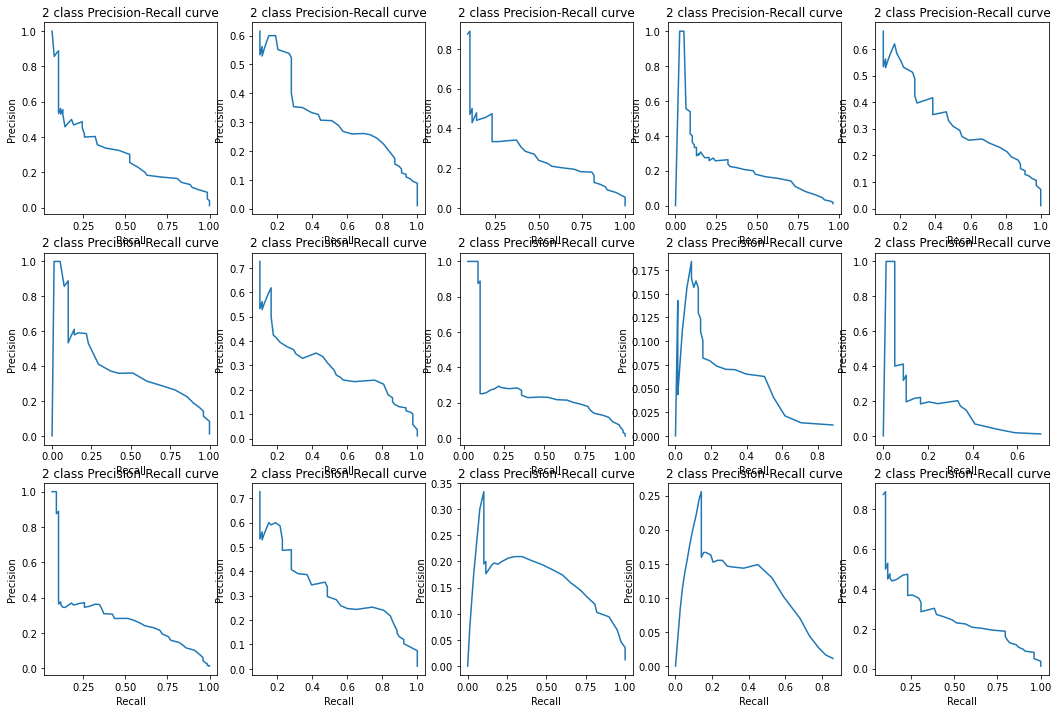

In [440]:
printCurve(rec_score_list, prc_score_list, "2 class Precision-Recall curve", "Recall", "Precision")

In [446]:
best_model_index = 4
model_list[best_model_index].summary()
print(F"model {best_model_index} training loss = {history_list[best_model_index].history['loss'][-1]}")
print(F"model {best_model_index} validation loss = {history_list[best_model_index].history['val_loss'][-1]}")

Model: "sequential_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_396 (Dense)            (None, 5)                 45        
_________________________________________________________________
dense_397 (Dense)            (None, 3)                 18        
_________________________________________________________________
dense_398 (Dense)            (None, 5)                 20        
_________________________________________________________________
dense_399 (Dense)            (None, 8)                 48        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
model 4 training loss = 0.5286298250489964
model 4 validation loss = 0.555010494410512


In [447]:
model = model_list[best_model_index]
history = history_list[best_model_index]

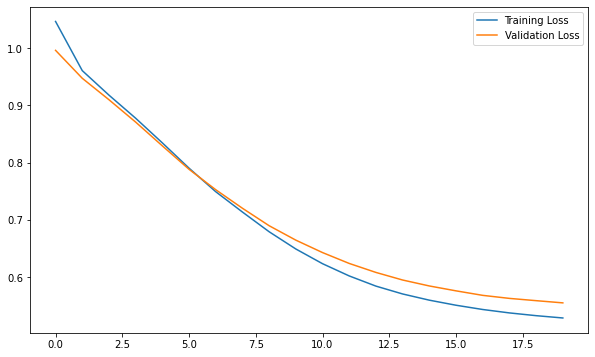

In [448]:
# print the loss with epochs
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

In [479]:
pred1 = model.predict(X_testing)
score1 = np.sqrt(metrics.mean_squared_error(pred1,X_testing))
print(f"Test smaples Score (RMSE): {score1}")

Test smaples Score (RMSE): 0.7478340748685351


In [480]:
# this dataframe shows the difference between the actural pm2.5 and the reconstructed pm2.5
df_diff = X_testing[:, 0] - pred1[:, 0]

diff = np.absolute(df_diff)
# df_diff = df_diff.values

In [481]:
# actural numbers of anomaly data classified by the "rule" we set
true_tag = testing_data_tag

In [482]:
df_diff.shape

(10428,)

In [483]:
threshold = np.arange(0.1, 6, 0.1)
rec_score = np.zeros(len(threshold))
# pred_tag = np.zeros(len(threshold))
prc_score = np.zeros(len(threshold))

In [484]:
diff.shape

(10428,)

In [485]:
for i in range(len(threshold)):
    pred_tag = (diff >= threshold[i])
    rec_score[i] = sklearn.metrics.recall_score(true_tag, pred_tag)
    prc_score[i] = sklearn.metrics.precision_score(true_tag, pred_tag)
    pred_tag = np.zeros(len(threshold))

In [486]:
def printCuv(x, y, title, xlabel, ylabel):
    plt.figure()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x, y)

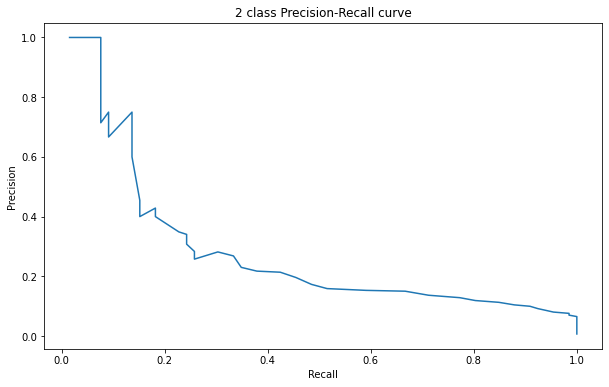

In [487]:
printCuv(rec_score, prc_score, "2 class Precision-Recall curve", "Recall", "Precision")

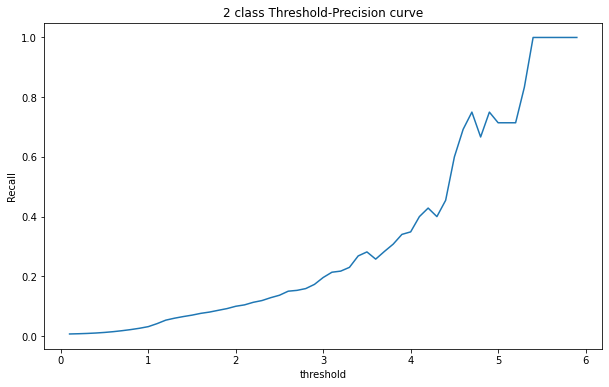

In [488]:
printCuv(threshold, prc_score, "2 class Threshold-Precision curve", "threshold", "Recall")

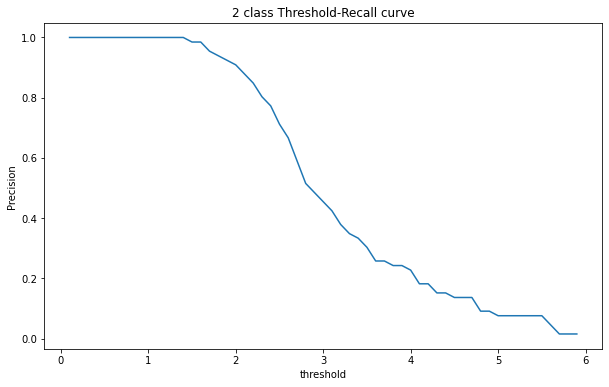

In [489]:
printCuv(threshold, rec_score, "2 class Threshold-Recall curve", "threshold", "Precision")